   a  b  c  d  e  f  g  digit
0  1  1  1  1  1  1  0      0
1  0  1  1  0  0  0  0      1
2  1  1  0  1  1  0  1      2
3  1  1  1  1  0  0  1      3
4  0  1  1  0  0  1  1      4
5  1  0  1  1  0  1  1      5
6  0  0  1  1  1  1  1      6
7  1  1  1  0  0  0  0      7
8  1  1  1  1  1  1  1      8
9  1  1  1  0  0  1  1      9
Epoch 0 Loss: 4.056232321944043
Input: [[1 1 1 1 1 1 0]] Predicted: [[0.3776248  0.49705078 0.861638   0.69966433 0.10215511 0.1161989
  0.92453075 0.15961155 0.82187407 0.9838214 ]] Actual: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[0 1 1 0 0 0 0]] Predicted: [[0.30342134 0.46952888 0.80571501 0.74941462 0.07645454 0.11206817
  0.93076528 0.12785205 0.85826894 0.98418537]] Actual: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[1 1 0 1 1 0 1]] Predicted: [[0.40067329 0.44801776 0.8988768  0.6949184  0.09747057 0.12828039
  0.89744118 0.18315986 0.8528482  0.99008932]] Actual: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9


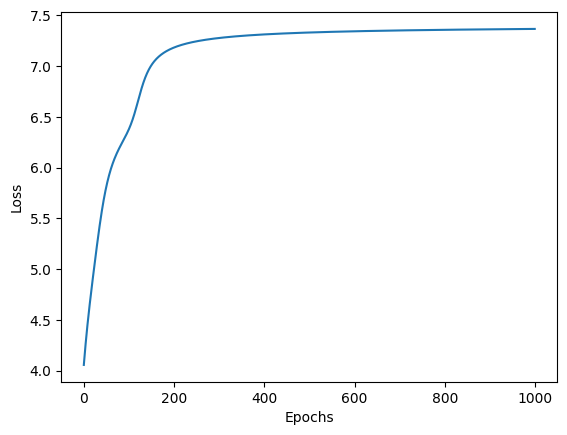

In [ ]:
import numpy as np
import pandas as pd

# 7-segment display encoding for digits 0-9
seven_segment_data = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [0, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 0, 0, 1, 1]
}

# Converting the data to arrays
inputs = np.array(list(seven_segment_data.values()))
labels = np.eye(10)  # One-hot encoded labels for digits 0-9

# Combine into a DataFrame for easy visualization (optional)
df = pd.DataFrame(inputs, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
df['digit'] = range(10)
print(df)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Network architecture
input_size = 7
hidden_layer1_size = 10
hidden_layer2_size = 10
output_size = 10

global weights1, bias1, weights2, bias2, weights3, bias3

# Initialize weights and biases randomly
np.random.seed(42)  # For reproducibility
weights1 = np.random.randn(input_size, hidden_layer1_size)
bias1 = np.random.randn(hidden_layer1_size)
weights2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
bias2 = np.random.randn(hidden_layer2_size)
weights3 = np.random.randn(hidden_layer2_size, output_size)
bias3 = np.random.randn(output_size)




#Feedforward function
def feedforward(inputs):
    global weights1, bias1, weights2, bias2, weights3, bias3
    global hidden_layer1_output, hidden_layer2_output, output

    hidden_layer1_output = sigmoid(np.dot(inputs, weights1) + bias1)
    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, weights2) + bias2)
    output = sigmoid(np.dot(hidden_layer2_output, weights3) + bias3)

    return output

#Backpropagation function
def backpropagation(inputs, labels):
    global weights1, bias1, weights2, bias2, weights3, bias3
    global hidden_layer1_output, hidden_layer2_output, output

    #Output layer error and delta
    output_error = labels - output
    output_delta = output_error * sigmoid_derivative(output)

    #Hidden layer 2 error and delta
    hidden_layer2_error = np.dot(output_delta, weights3.T)
    hidden_layer2_delta = hidden_layer2_error * sigmoid_derivative(hidden_layer2_output)

    #Hidden layer 1 error and delta
    hidden_layer1_error = np.dot(hidden_layer2_delta, weights2.T)
    hidden_layer1_delta = hidden_layer1_error * sigmoid_derivative(hidden_layer1_output)

    #Gradient descent and weight updation
    weights3 -= learning_rate * np.dot(hidden_layer2_output.T, output_delta)
    bias3 -= learning_rate * np.sum(output_delta, axis=0)

    weights2 -= learning_rate * np.dot(hidden_layer1_output.T, hidden_layer2_delta)
    bias2 -= learning_rate * np.sum(hidden_layer2_delta, axis=0)

    weights1 -= learning_rate * np.dot(inputs.T, hidden_layer1_delta)
    bias1 -= learning_rate * np.sum(hidden_layer1_delta, axis=0)

    #Mean Square Error
    return np.mean(output_error ** 2)

import matplotlib.pyplot as plt

epochs = 1000
learning_rate = 0.01
loss_history = []


for epoch in range(epochs):
    epoch_loss=0
    for i in range(len(inputs)):
        input_vectors = inputs[i].reshape(1, -1)
        label = labels[i].reshape(1, -1)

        feedforward(input_vectors)
        epoch_loss += backpropagation(input_vectors, label)
    loss_history.append(epoch_loss)
    #print Input Vector, Predicted Output, Actual Output
    if epoch % 100 == 0:
        print(f'Epoch {epoch} Loss: {epoch_loss}')
        for i in range(len(inputs)):
            input_vectors = inputs[i].reshape(1, -1)
            label = labels[i].reshape(1, -1)
            actual_prediction = np.argmax(feedforward(input_vectors))


            print(f'Input: {input_vectors} Predicted: {feedforward(input_vectors)} Actual: {label} Predicted Digit: {actual_prediction}')
            

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [2]:
df.to_csv('seven_segment_data.csv', index=False)

In [3]:
df.head()

,a,b,c,d,e,f,g,digit
0,1,1,1,1,1,1,0,0
1,0,1,1,0,0,0,0,1
2,1,1,0,1,1,0,1,2
3,1,1,1,1,0,0,1,3
4,0,1,1,0,0,1,1,4


Epoch 0 Loss: 4.008672302932603
Input: [[1 1 1 1 1 1 0]] Predicted: [[0.36 0.48 0.84 0.67 0.11 0.12 0.92 0.16 0.81 0.98]] Actual: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[0 1 1 0 0 0 0]] Predicted: [[0.29 0.45 0.78 0.72 0.08 0.11 0.93 0.12 0.85 0.98]] Actual: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[1 1 0 1 1 0 1]] Predicted: [[0.39 0.43 0.88 0.66 0.1  0.13 0.89 0.18 0.84 0.99]] Actual: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[1 1 1 1 0 0 1]] Predicted: [[0.34 0.44 0.85 0.72 0.08 0.12 0.91 0.16 0.86 0.99]] Actual: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[0 1 1 0 0 1 1]] Predicted: [[0.29 0.42 0.74 0.72 0.06 0.12 0.93 0.1  0.86 0.99]] Actual: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[1 0 1 1 0 1 1]] Predicted: [[0.54 0.26 0.91 0.73 0.06 0.16 0.88 0.13 0.89 0.99]] Actual: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] Predicted Digit: 9
Input: [[0 0 1 1 1 1 1]] Predicted: [[0.32 0.45 0.76 0.73 0.06

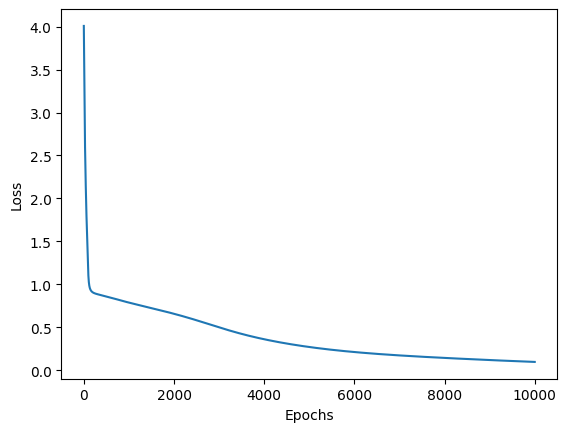

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 7-segment display encoding for digits 0-9
seven_segment_data = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [0, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 0, 0, 1, 1]
}

# Convert data to arrays
inputs = np.array(list(seven_segment_data.values()))
labels = np.eye(10)  # One-hot encoded labels for binary classification

# Network architecture
input_size = 7
hidden_layer1_size = 10
hidden_layer2_size = 10
output_size = 10

# Initialize weights and biases
np.random.seed(42)
weights1 = np.random.randn(input_size, hidden_layer1_size)
bias1 = np.random.randn(hidden_layer1_size)
weights2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
bias2 = np.random.randn(hidden_layer2_size)
weights3 = np.random.randn(hidden_layer2_size, output_size)
bias3 = np.random.randn(output_size)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feedforward(inputs):
    global hidden_layer1_output, hidden_layer2_output, output

    hidden_layer1_output = sigmoid(np.dot(inputs, weights1) + bias1)
    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, weights2) + bias2)
    output = sigmoid(np.dot(hidden_layer2_output, weights3) + bias3)
    return output

# Backpropagation function
def backpropagation(inputs, labels):
    global weights1, bias1, weights2, bias2, weights3, bias3

    # Forward pass
    feedforward(inputs)

    # Output layer error and delta
    output_error = labels - output
    output_delta = output_error * sigmoid_derivative(output)

    # Hidden layer 2 error and delta
    hidden_layer2_error = np.dot(output_delta, weights3.T)
    hidden_layer2_delta = hidden_layer2_error * sigmoid_derivative(hidden_layer2_output)

    # Hidden layer 1 error and delta
    hidden_layer1_error = np.dot(hidden_layer2_delta, weights2.T)
    hidden_layer1_delta = hidden_layer1_error * sigmoid_derivative(hidden_layer1_output)

    # Update weights and biases
    weights3 += learning_rate * np.dot(hidden_layer2_output.T, output_delta)
    bias3 += learning_rate * np.sum(output_delta, axis=0)
    weights2 += learning_rate * np.dot(hidden_layer1_output.T, hidden_layer2_delta)
    bias2 += learning_rate * np.sum(hidden_layer2_delta, axis=0)
    weights1 += learning_rate * np.dot(inputs.T, hidden_layer1_delta)
    bias1 += learning_rate * np.sum(hidden_layer1_delta, axis=0)

    return np.mean(output_error ** 2)

# Training parameters
epochs = 10000
learning_rate = 0.01
loss_history = []

# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(inputs)):
        input_vector = inputs[i].reshape(1, -1)
        label = labels[i].reshape(1, -1)
        feedforward(input_vector)
        epoch_loss += backpropagation(input_vector, label)
    loss_history.append(epoch_loss)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch} Loss: {epoch_loss}')
        for i in range(len(inputs)):
            input_vector = inputs[i].reshape(1, -1)
            label = labels[i].reshape(1, -1)
            prediction = feedforward(input_vector)
            predicted_digit = np.argmax(prediction)
            print(f'Input: {input_vector} Predicted: {np.round(prediction, 2)} Actual: {label} Predicted Digit: {predicted_digit}')

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
